# Podcast Recommander System

## Table of Contents

- Dependancies and Dataset

- Data Cleaning

- Data Exploration

-----------
Popularity Based Recommendation

Data Preprocessing

Machine Learning Modelling and Output

# Dependancies and Dataset

## Importing Dependancies

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
data = pd.read_csv('metadata.csv')

data.head(5)

,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix
0,spotify:show:2NYtxEZyYelR6RMKmjfPLB,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],https://anchor.fm/s/11b84b68/podcast/rss,spotify:episode:000A9sRBYdVh66csG2qEdj,1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,show_2NYtxEZyYelR6RMKmjfPLB,000A9sRBYdVh66csG2qEdj
1,spotify:show:15iWCbU7QoO23EndPEO6aN,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],https://anchor.fm/s/b07181c/podcast/rss,spotify:episode:000HP8n3hNIfglT2wSI2cA,The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,show_15iWCbU7QoO23EndPEO6aN,000HP8n3hNIfglT2wSI2cA
2,spotify:show:6vZRgUFTYwbAA79UNCADr4,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],https://anchor.fm/s/81a072c/podcast/rss,spotify:episode:001UfOruzkA3Bn1SPjcdfa,Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,show_6vZRgUFTYwbAA79UNCADr4,001UfOruzkA3Bn1SPjcdfa
3,spotify:show:5BvKEjaMSuvUsGROGi2S7s,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],https://anchor.fm/s/917dba4/podcast/rss,spotify:episode:001i89SvIQgDuuyC53hfBm,Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200,show_5BvKEjaMSuvUsGROGi2S7s,001i89SvIQgDuuyC53hfBm
4,spotify:show:7w3h3umpH74veEJcbE6xf4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],https://www.fuckboisoflit.com/episodes?format=rss,spotify:episode:0025RWNwe2lnp6HcnfzwzG,"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050,show_7w3h3umpH74veEJcbE6xf4,0025RWNwe2lnp6HcnfzwzG


## Data Cleaning

### Checking Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105360 entries, 0 to 105359
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   show_uri                 105360 non-null  object 
 1   show_name                105360 non-null  object 
 2   show_description         105358 non-null  object 
 3   publisher                105360 non-null  object 
 4   language                 105360 non-null  object 
 5   rss_link                 105360 non-null  object 
 6   episode_uri              105360 non-null  object 
 7   episode_name             105360 non-null  object 
 8   episode_description      105155 non-null  object 
 9   duration                 105360 non-null  float64
 10  show_filename_prefix     105360 non-null  object 
 11  episode_filename_prefix  105360 non-null  object 
dtypes: float64(1), object(11)
memory usage: 9.6+ MB


In [4]:
df = data.copy()

In [5]:
# Check for missing values
df.isnull().sum()

show_uri                     0
show_name                    0
show_description             2
publisher                    0
language                     0
rss_link                     0
episode_uri                  0
episode_name                 0
episode_description        205
duration                     0
show_filename_prefix         0
episode_filename_prefix      0
dtype: int64

In [6]:
# Fill missing values
df['show_description'].fillna("No description available", inplace=True)
df['episode_description'].fillna("No description available", inplace=True)

In [7]:
# df.isnull().sum()

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.head()

,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix
0,spotify:show:2NYtxEZyYelR6RMKmjfPLB,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],https://anchor.fm/s/11b84b68/podcast/rss,spotify:episode:000A9sRBYdVh66csG2qEdj,1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,show_2NYtxEZyYelR6RMKmjfPLB,000A9sRBYdVh66csG2qEdj
1,spotify:show:15iWCbU7QoO23EndPEO6aN,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],https://anchor.fm/s/b07181c/podcast/rss,spotify:episode:000HP8n3hNIfglT2wSI2cA,The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,show_15iWCbU7QoO23EndPEO6aN,000HP8n3hNIfglT2wSI2cA
2,spotify:show:6vZRgUFTYwbAA79UNCADr4,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],https://anchor.fm/s/81a072c/podcast/rss,spotify:episode:001UfOruzkA3Bn1SPjcdfa,Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,show_6vZRgUFTYwbAA79UNCADr4,001UfOruzkA3Bn1SPjcdfa
3,spotify:show:5BvKEjaMSuvUsGROGi2S7s,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],https://anchor.fm/s/917dba4/podcast/rss,spotify:episode:001i89SvIQgDuuyC53hfBm,Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200,show_5BvKEjaMSuvUsGROGi2S7s,001i89SvIQgDuuyC53hfBm
4,spotify:show:7w3h3umpH74veEJcbE6xf4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],https://www.fuckboisoflit.com/episodes?format=rss,spotify:episode:0025RWNwe2lnp6HcnfzwzG,"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050,show_7w3h3umpH74veEJcbE6xf4,0025RWNwe2lnp6HcnfzwzG


In [10]:
## Creating a seperate dataframe from the existing dataframe.

df_new = df[['show_name','show_description','publisher','language','episode_name','episode_description','duration']] 

In [11]:
df_new.head(10)

,show_name,show_description,publisher,language,episode_name,episode_description,duration
0,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133
1,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383
2,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333
3,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200
4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050
5,UPSC Podcasts,Podcasts useful for UPSC aspirants! Mainly dis...,UPSC Podcast,['en'],Tourism in India : Opportunities and Challenges,.,13.788000
6,The Feminization Boudoir,Enter the world of dominant women and submissi...,Kylie Gable,['en'],The Sissy's Mentor (Part 5),Miss Jenn Davis reads the final part of The Si...,30.589200
7,Chastity and The City,"We are four, 30 somethings living in a city sh...",Chastity,['en'],Our Journey with Chastity,In today's episode of Chasity and the City we ...,39.437133
8,They Had to Go Out,Get ready to whiten those knuckles and hold fa...,They Had to Go Out,['en'],Episode 50: Dan Shirey - BM - Surfman - 44 MLB...,Former Boatswain’s Mate Dan Shirey talks pitch...,58.469783
9,The Good Sign,Let’s be real and honest! Life can be challeng...,Donna Simantov,['en'],Talia and me part 2!,Join us as we learn the tricks and tips of sta...,31.074483


In [12]:
# Descriptive Analysis

df_new.duration.describe()

count    105360.000000
mean         33.845715
std          22.735674
min           0.175317
25%          13.552638
50%          31.643375
75%          50.446825
max         304.953900
Name: duration, dtype: float64

In [13]:
# Select rows with duration less than 10
duration_less_than_5 = df[df['duration'] < 5]

# Print the summary statistics for the selected rows
print(duration_less_than_5.describe())
# duration_less_than_10.head()

          duration
count  9611.000000
mean      2.896301
std       1.185449
min       0.175317
25%       1.991850
50%       2.969050
75%       3.829767
max       4.999650


In [14]:
# episodes.drop(episodes[episodes["audio_length"] < 1].index, inplace = True)
df_new.drop(df_new[df_new['duration']<5].index,inplace = True)


In [15]:
# df_new.describe()

# Data Cleaning

In [16]:
def cleaning(data, column):
    df = data.copy()
    df[column] = df[column].str.lower()
    
    # fastest source of contractions I could find: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
    contractions = { 
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
#   cleaning the text for the contractions
    for k, v in contractions.items():
        df[column] = df[column].str.replace(k.lower(), v.lower())
        
#   making a list of the neutral characters to delete in the text
    special_characters={
    "-": " ",
    "\'": " ",
    "\"": " ",
    ",": " ",
    "$": " ",
    "%": " ",
    "[": " ",
    "]": " ",
    ".": " ",
    "/": " ",
    "?": " ? "
    }
    
#   cleaning the data with the special characters
    for k, v in special_characters.items():
        df[column] = df[column].str.replace(k,v)
        
#   replacing multiple spaces with a single space
    for s in range(1, 8):
        df[column] = df[column].str.replace(" "*s, " ")

#   attempting to strip the HTML code in descriptions
    for i, string in enumerate(df[column]):
        try:
            string = re.sub(r"<[^>]*>", "", string)
            df[column][i] = string

        except:
            pass
        
    # making a column for any left over/missed descriptions with HTML code 
    df["html_uncleaned"] = df[column].str.contains("</")
    # drop the episodes that still have HTML (there should not be contextual information on the episode)
    drop_it = df[df["html_uncleaned"] == 1].index
    df = df.drop(drop_it)
    df = df.drop(columns="html_uncleaned")

    # fill all NAN object cells with empty string
    df = df.fillna("")
    # drop the episodes with no text information (there is no ability to save the data)
    drop_it = df[df[column] == ""].index
    df = df.drop(drop_it)

    # Use regular expressions to keep only numbers and alphabets in the text
    df[column] = df[column].apply(lambda text: re.sub(r'[^a-z0-9\s]', '', text))
    
    # Replace multiple spaces with a single space
    df[column] = df[column].str.replace(r'\s+', ' ')
    
    # Remove leading and trailing spaces
    df[column] = df[column].str.strip()
    
    # Drop rows with empty text after cleaning
    df = df.drop(df[df[column] == ""].index)
    
    # reset the index and drop the original & return
    return df.reset_index(drop=True)

In [17]:
#Cleaning Column show description
df_new = cleaning(df_new,'show_description')

In [18]:
#Cleaning Column episode_description
df_new = cleaning(df_new,'episode_description')

In [19]:
#Cleaning Column episode_description
df_new = cleaning(df_new,'show_name')

In [20]:
#Cleaning Column episode_description
df_new = cleaning(df_new,'episode_name')

In [21]:
df_new.head()

,show_name,show_description,publisher,language,episode_name,episode_description,duration
0,kream in your koffee,a 20 something blunt female takes on the world...,Katie Houle,['en'],1 its christmas time,on the first ever episode of kream in your kof...,12.700133
1,morning cup of murder,ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],the goleta postal facility shootings january 3...,see something say something its a mantra many ...,6.019383
2,inside the 18 a podcast for goalkeepers by goa...,inside the 18 is your source for all things go...,Inside the 18 GK Media,['en'],ep 36 incorporating a singular goalkeeping cur...,todays episode is a sit down michael and omar ...,43.616333
3,arrowhead live,your favorite podcast for everything chiefs pr...,Arrowhead Live!,['en-US'],episode 1 arrowhead live debut,join us as we take a look at all current chief...,58.189200
4,fbol,the comedy podcast about toxic characters writ...,Emily Edwards,['en'],the lion the witch and the wardrobe ashley beall,the modern morality tail of how to stay good f...,51.782050


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105360 entries, 0 to 105359
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   show_uri                 105360 non-null  object 
 1   show_name                105360 non-null  object 
 2   show_description         105360 non-null  object 
 3   publisher                105360 non-null  object 
 4   language                 105360 non-null  object 
 5   rss_link                 105360 non-null  object 
 6   episode_uri              105360 non-null  object 
 7   episode_name             105360 non-null  object 
 8   episode_description      105360 non-null  object 
 9   duration                 105360 non-null  float64
 10  show_filename_prefix     105360 non-null  object 
 11  episode_filename_prefix  105360 non-null  object 
dtypes: float64(1), object(11)
memory usage: 14.5+ MB


In [23]:
data1 = df_new.copy()

In [24]:
data = data1.iloc[:10000]

In [25]:
data

,show_name,show_description,publisher,language,episode_name,episode_description,duration
0,kream in your koffee,a 20 something blunt female takes on the world...,Katie Houle,['en'],1 its christmas time,on the first ever episode of kream in your kof...,12.700133
1,morning cup of murder,ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],the goleta postal facility shootings january 3...,see something say something its a mantra many ...,6.019383
2,inside the 18 a podcast for goalkeepers by goa...,inside the 18 is your source for all things go...,Inside the 18 GK Media,['en'],ep 36 incorporating a singular goalkeeping cur...,todays episode is a sit down michael and omar ...,43.616333
3,arrowhead live,your favorite podcast for everything chiefs pr...,Arrowhead Live!,['en-US'],episode 1 arrowhead live debut,join us as we take a look at all current chief...,58.189200
4,fbol,the comedy podcast about toxic characters writ...,Emily Edwards,['en'],the lion the witch and the wardrobe ashley beall,the modern morality tail of how to stay good f...,51.782050
...,...,...,...,...,...,...,...
9995,optimal relationships daily,where vision meets expertise the art of kreati...,Justin Malik,['en'],483 the dangers of post break up dating by edd...,eddie corbano of love s a game shares the dang...,7.204383
9996,what if,monica yates is a icf women s life period coac...,Karim Mustaghni,['en'],6 what if we were living in a world of perfect...,what if we were living in a world of perfect e...,35.156567
9997,aesthetic pleasers,horror stories to keep you up at night support...,Tyler,['en'],ep 2 fortnite pt 1,the brownies got us,5.092133
9998,the exploring series,why bother searching for the best blogs about ...,ManggMangg,['en-US'],exploring the scp foundation scp 342 a ticket ...,http www scp wiki net scp 342 support the patr...,23.370883


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [27]:
# Step 1: Load and preprocess the data (assuming you've already loaded the data into a pandas DataFrame named 'data')
# You can drop any unnecessary columns that won't be used for content-based recommendations.
data = data[['show_name', 'show_description', 'episode_name', 'episode_description']]


## Determining Genres for podcasts

In [28]:
import spacy

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

def determine_genre(text):
    doc = nlp(text)
    genres = {
        "comedy": ["comedy", "funny", "humor", "joke", "laughs", "hilarious", "stand-up", "comedian", "giggles", "amusing", "laughter"],
        "technology": ["technology", "tech", "gadget", "innovation", "software", "hardware", "devices", "digital", "internet", "innovative", "tech-savvy"],
        "sports": ["sports", "athletics", "games", "competition", "team", "athletes", "matches", "playoffs", "athleticism", "sportsmanship", "championship"],
        "history": ["history", "historical", "past", "ancient", "historian", "archaeology", "ancestors", "civilization", "historical figures", "time-honored", "heritage"],
        "true crime": ["true crime", "crime", "criminal", "investigation", "murder", "detective", "mystery", "criminals", "cold case", "crime scene", "unsolved"],
        "education": ["education", "learn", "teach", "knowledge", "learning", "academics", "school", "courses", "educational", "study", "training"],
        "business and entrepreneurship": ["business", "entrepreneurship", "startups", "economy", "entrepreneur", "investment", "market", "finance", "business plan", "business strategy", "startup culture"],
        "health and fitness": ["health", "wellness", "fitness", "nutrition", "medicine", "mental health", "well-being", "exercise", "healthy lifestyle", "self-care", "workout"],
        "music": ["music", "songs", "musicians", "bands", "melody", "concert", "artists", "instrument", "musical", "melodic", "songwriting"],
        "arts and literature": ["arts", "painting", "sculpture", "creativity", "artists", "artistic", "gallery", "visual arts", "literature", "creative expression", "poetry"],
        "science": ["science", "scientists", "research", "discoveries", "scientific", "experiments", "biology", "physics", "chemistry", "astronomy", "scientific method"],
        "fiction": ["fiction", "novel", "story", "narrative", "plot", "characters", "fantasy", "adventure", "fictional", "imaginative", "novelist"],
        "society and culture": ["society", "culture", "social", "community", "customs", "traditions", "people", "relationships", "cultural", "societal", "anthropology"],
        "news and politics": ["news", "politics", "current events", "government", "elections", "policies", "world affairs", "political", "journalism", "media"],
        "travel": ["travel", "journey", "explore", "adventure", "destinations", "vacation", "wanderlust", "tourism", "exploration", "traveler", "adventurer"],
        "self-help and motivation": ["self-help", "motivation", "inspiration", "self-improvement", "personal growth", "positivity", "confidence", "self-motivation", "self-development"],
        "spirituality and religion": ["spirituality", "religion", "faith", "beliefs", "meditation", "prayer", "divine", "spiritual journey", "theology", "spiritual awakening"],
        "interview and conversations": ["interview", "conversations", "discussion", "guests", "interviewee", "dialogue", "Q&A", "conversational", "talk show", "dialog"],
        "documentary": ["documentary", "real-life", "non-fiction", "reality", "journalism", "investigative", "factual", "real events", "true story", "real people"],
        "mental health and wellness": ["mental health", "therapy", "counseling", "mental well-being", "psychological support", "mental health treatment"],
        "DIY and hobbies": ["DIY", "hobbies", "crafts", "handmade", "do it yourself", "creative projects", "DIYers", "hobbyist", "crafting"],
        "parenting and family": ["parenting", "family", "children", "kids", "motherhood", "fatherhood", "parenthood", "parenting tips", "family relationships", "child-rearing"],
        "gaming": ["gaming", "video games", "gamers", "playstation", "xbox", "PC gaming", "gaming community", "gaming culture", "gaming industry"],
        "food and cooking": ["food", "cooking", "recipes", "culinary", "chef", "cuisine", "restaurant", "gastronomy", "foodie", "cooking techniques"],
        "marketing and branding": ["marketing", "branding", "advertising", "business growth", "promotion", "digital marketing", "brand identity", "marketing strategies"],
        "pop culture": ["pop culture", "celebrities", "entertainment", "trends", "media", "movies", "TV shows", "celebrity news", "entertainment industry"],
        "philosophy": ["philosophy", "philosophical", "ethics", "thinkers", "existential", "metaphysics", "philosopher", "philosophical inquiry"],
        "design and creativity": ["design", "creativity", "art", "creative thinking", "designers", "innovation", "creative process", "design principles"],
        "nature and environment": ["nature", "environment", "ecology", "conservation", "wildlife", "natural world", "environmental issues", "sustainability"],
        "medical and healthcare": ["medical", "healthcare", "health services", "medicine", "doctors", "health professionals", "health conditions", "health and wellness", "healthcare technology", "medical advancements"],
        "technology reviews and gadgets": ["technology reviews", "gadgets", "tech reviews", "electronic gadgets", "tech gadgets", "product reviews", "gadget enthusiasts"],
        "psychology and behavior": ["psychology", "behavior", "mental processes", "mindset", "psychological", "human behavior", "cognitive psychology", "behavioral science"],
        "home and interior design": ["home", "interior design", "home decor", "home improvement", "interior decoration", "house design", "home renovation"],
        "fashion and beauty": ["fashion", "beauty", "style", "clothing", "makeup", "fashion trends", "beauty tips", "fashion influencers"],
        "language learning": ["language learning", "language acquisition", "learn a language", "language courses", "language skills", "language lessons"],
        "conspiracy theories": ["conspiracy theories", "conspiracies", "secret societies", "cover-ups", "hidden truths", "conspiracy theorists"],
        "paranormal and supernatural": ["paranormal", "supernatural", "ghosts", "hauntings", "unexplained phenomena", "paranormal investigations", "occult"],
        "storytelling and narrative": ["storytelling", "narrative", "storytellers", "oral storytelling", "narration", "storytelling techniques"],
        "comedy interviews": ["comedy interviews", "funny interviews", "comedy guests", "comedians interviews", "interviews with comedians", "humorous interviews"],
        "LGBTQ+ topics": ["LGBTQ+", "LGBTQ issues", "queer topics", "LGBTQ community", "LGBTQ rights", "gender identity", "sexual orientation"],
        "career advice and job hunting": ["career advice", "job hunting", "job search", "job interviews", "career development", "career tips"],
        "philosophy and ethics": ["philosophy", "ethics", "moral principles", "ethical dilemmas", "moral philosophy", "ethical questions"],
        "parenting tips and advice": ["parenting tips", "parenting advice", "parenting strategies", "parenting skills", "parenting challenges", "parenting support"],
        "astronomy and space exploration": ["astronomy", "space exploration", "cosmology", "celestial bodies", "space missions", "astronomical discoveries"],
        "motivational and inspirational": ["motivational", "inspirational", "inspiring stories", "motivational speeches", "inspirational quotes", "positive mindset"],
        "mental health and therapy": ["mental health", "therapy", "counseling", "mental well-being", "psychological support", "mental health treatment"],
        "finance and investment": ["finance", "investment", "personal finance", "financial planning", "financial literacy", "investment strategies"],
        "environmental sustainability": ["environmental sustainability", "sustainable living", "eco-friendly", "green living", "sustainable practices", "climate change"],
        "educational technology (EdTech)": ["EdTech", "educational technology", "technology in education", "online learning", "e-learning", "educational apps"],
        "meditation and mindfulness": ["meditation", "mindfulness", "mindful living", "meditative practices", "mindfulness techniques", "guided meditation"],
        "political commentary": ["political commentary", "political analysis", "current political issues", "political opinions", "political debate"],
        "relationship and dating": ["relationship", "dating", "romantic relationships", "dating advice", "relationship tips", "love and dating"],
        "travel destinations and guides": ["travel destinations", "travel guides", "travel tips", "travel recommendations", "sightseeing", "travel experiences"],
        "business insights and trends": ["business insights", "business trends", "industry analysis", "business strategies", "entrepreneurial insights"],
        "movie reviews and critiques": ["movie reviews", "film critiques", "movie analysis", "film reviews", "cinema reviews", "movie recommendations"],
        "educational history": ["educational history", "historical education", "history lessons", "educational stories from the past", "educational history podcasts"],
        "true adventure and exploration": ["true adventure", "exploration", "real-life adventure stories", "explorers", "journeys into the unknown"],
        "social issues and activism": ["social issues", "activism", "social justice", "community engagement", "social change", "advocacy"],
        "nature and wildlife conservation": ["nature conservation", "wildlife conservation", "environmental conservation", "conservation efforts", "protecting wildlife"],
    }

    for genre, keywords in genres.items():
        if any(keyword in text.lower() for keyword in keywords):
            return genre

    return "unknown"




In [29]:
# Example usage
show_name = "TechTalk Podcast"
show_description = "A podcast about the latest technology trends and innovations."
episode_name = "Funny Tech Fails"
episode_description = "Laugh with us as we explore hilarious tech fails."

print(determine_genre(show_name))
print(determine_genre(show_description))
print(determine_genre(episode_name))
print(determine_genre(episode_description))

technology
technology
comedy
comedy


In [30]:
data["Genre"] = ""
for i in range(len(data)):
    gen1 = determine_genre(data['show_name'][i])
    gen2 = determine_genre(data['show_description'][i])
    gen3 = determine_genre(data['episode_name'][i])
    gen4 = determine_genre(data['episode_description'][i])

    # Create a list to store non-empty and non-unknown genres
    valid_genres = [gen for gen in [gen1, gen2, gen3, gen4] if gen != "unknown"]

    # Join the valid genres together with commas
    data['Genre'][i] = ', '.join(valid_genres)

In [31]:
data

,show_name,show_description,episode_name,episode_description,Genre
0,kream in your koffee,a 20 something blunt female takes on the world...,1 its christmas time,on the first ever episode of kream in your kof...,interview and conversations
1,morning cup of murder,ever wonder what murder took place on today in...,the goleta postal facility shootings january 3...,see something say something its a mantra many ...,"true crime, history, history, true crime"
2,inside the 18 a podcast for goalkeepers by goa...,inside the 18 is your source for all things go...,ep 36 incorporating a singular goalkeeping cur...,todays episode is a sit down michael and omar ...,"technology, sports"
3,arrowhead live,your favorite podcast for everything chiefs pr...,episode 1 arrowhead live debut,join us as we take a look at all current chief...,"news and politics, news and politics"
4,fbol,the comedy podcast about toxic characters writ...,the lion the witch and the wardrobe ashley beall,the modern morality tail of how to stay good f...,"comedy, music"
...,...,...,...,...,...
9995,optimal relationships daily,where vision meets expertise the art of kreati...,483 the dangers of post break up dating by edd...,eddie corbano of love s a game shares the dang...,"society and culture, business and entrepreneur..."
9996,what if,monica yates is a icf women s life period coac...,6 what if we were living in a world of perfect...,what if we were living in a world of perfect e...,"health and fitness, business and entrepreneurship"
9997,aesthetic pleasers,horror stories to keep you up at night support...,ep 2 fortnite pt 1,the brownies got us,
9998,the exploring series,why bother searching for the best blogs about ...,exploring the scp foundation scp 342 a ticket ...,http www scp wiki net scp 342 support the patr...,"business and entrepreneurship, music"


In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [33]:
# !pip install sentence_transformers


In [34]:
X = np.array(data.episode_description)
data = data.dropna()

In [35]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [36]:
embed_data = embeddings
embed_data

array([[-0.17022972, -0.37867597,  0.59036565, ..., -0.22299562,
         0.14728998, -0.12970434],
       [ 0.26454014, -0.5600953 ,  1.0698037 , ...,  0.3998519 ,
        -0.00222413, -0.1812122 ],
       [-0.46477783,  0.10654137,  0.5018481 , ...,  0.56761426,
         0.6977255 , -0.07668712],
       ...,
       [-1.015429  , -0.46404722,  0.1657438 , ..., -0.23268767,
         1.0708044 , -0.3157447 ],
       [ 0.14235078, -0.32790858,  0.72052425, ...,  0.31972343,
        -0.20114654, -0.04460431],
       [-0.15463138, -0.68115664,  0.20501566, ...,  0.40561032,
        -0.20079125, -0.17709972]], dtype=float32)

In [37]:
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,-1.479697,0.240336,-0.649929,0.885318,2.463857
1,-0.298206,-1.708285,-0.382899,-4.007382,0.812068
2,-2.702103,0.815083,0.759867,0.999692,1.283797
3,-2.211373,4.272355,0.463903,0.187149,-1.578346
4,-2.045515,3.931327,0.697469,-0.496946,-2.386467


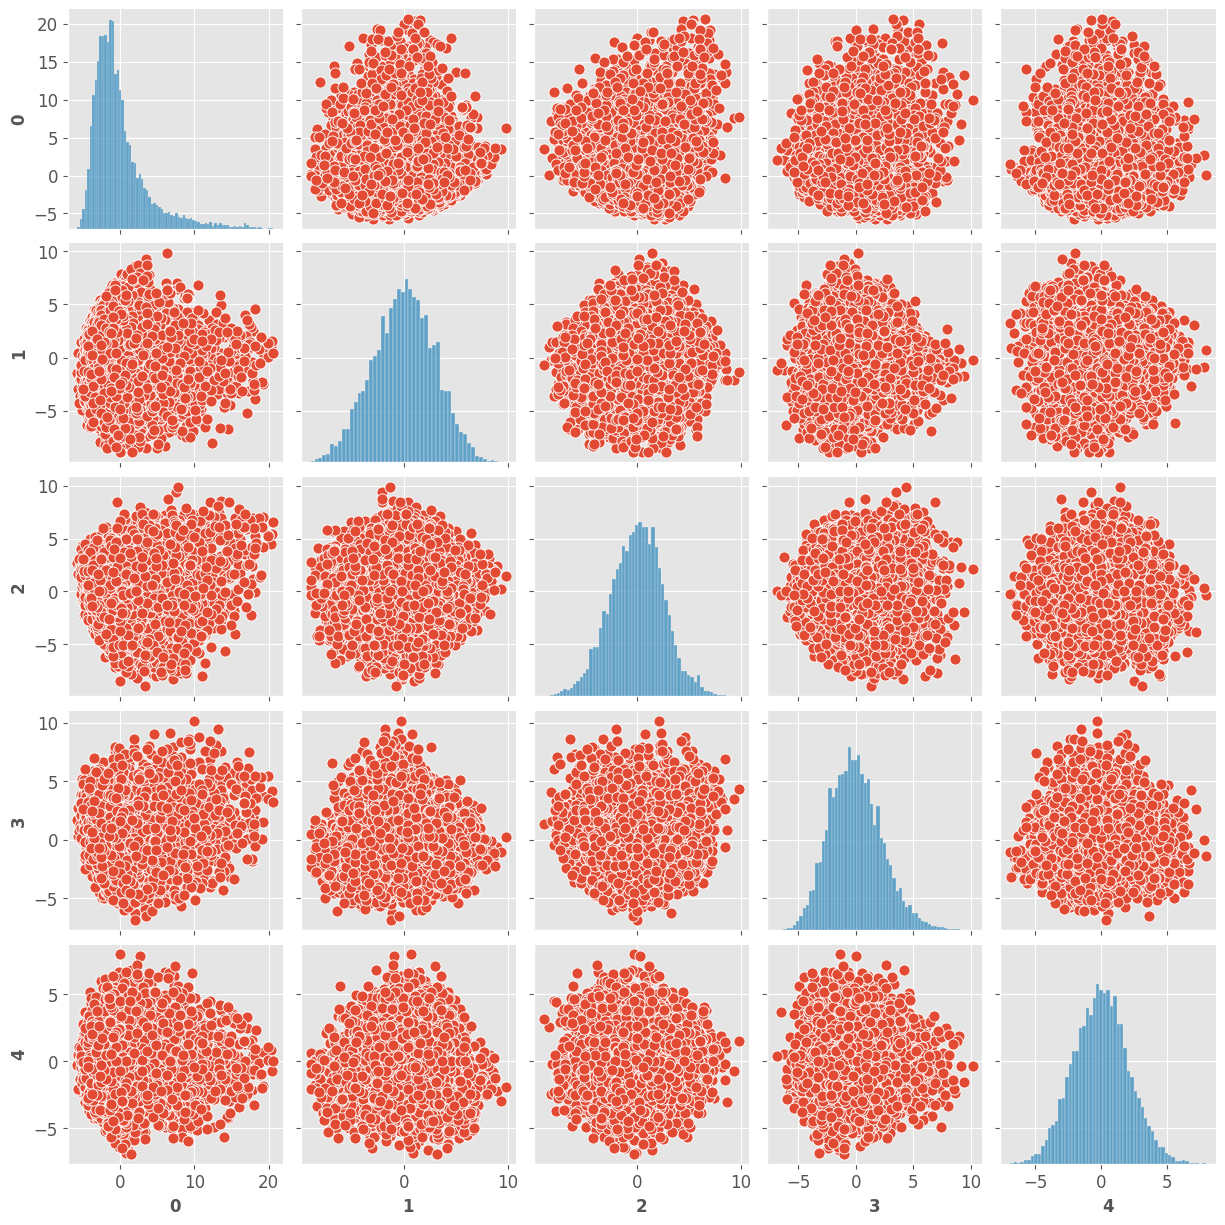

In [38]:
sns.pairplot(pca_data)


In [39]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  pods_recomm =  data['episode_name'].loc[index_recomm].values
  result = {'Podcast':pods_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The listened podcast is this one: %s \n'%(data['episode_name'].loc[index]))
    k=1
    for pods in pods_recomm:
      print('The number %i listened podcast is this one: %s \n'%(k,pods))
  if print_recommendation_plots==True:
    print('The plot of the listened podcast is this one:\n %s \n'%(data['episode_description'].loc[index]))
    k=1
    for q in range(len(pods_recomm)):
      plot_q = data['episode_description'].loc[index_recomm[q]]
      print('The plot of the number %i listened podcast is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the listened podcast is this one:\n %s \n'%(data['Genre'].loc[index]))
    k=1
    for q in range(len(pods_recomm)):
      plot_q = data['Genre'].loc[index_recomm[q]]
      print('The plot of the number %i recommended podcast is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

In [40]:
import pandas as pd

In [41]:
give_recommendations(2,True,True,True)


The listened podcast is this one: ep 36 incorporating a singular goalkeeping curriculum in the united states w guest phil wheddon 

The number 1 listened podcast is this one: ep 34 the incorporation of goalkeeping into coaching education w ian barker 

The number 1 listened podcast is this one: ep 89 from academy product to mls homegrown the rise of sj earthquakes jt marcinkowski 

The number 1 listened podcast is this one: ep 92 the modern goalkick why the goalkeeper is the new 10 

The number 1 listened podcast is this one: ep 96 what college gk coaches really look for in youth goalkeepers bundesliga tim howard mls decision day usl 1 golden glove 

The number 1 listened podcast is this one: ep 100 part 1 champions league wrap up full goalkeeping breakdown of ben foster s incredible watford performance in epl 

The plot of the listened podcast is this one:
 todays episode is a sit down michael and omar had with former usmnt and former uswnt goalkeeper coach phil wheddon phil discusses

{'Podcast': array(['ep 34 the incorporation of goalkeeping into coaching education w ian barker',
        'ep 89 from academy product to mls homegrown the rise of sj earthquakes jt marcinkowski',
        'ep 92 the modern goalkick why the goalkeeper is the new 10',
        'ep 96 what college gk coaches really look for in youth goalkeepers bundesliga tim howard mls decision day usl 1 golden glove',
        'ep 100 part 1 champions league wrap up full goalkeeping breakdown of ben foster s incredible watford performance in epl'],
       dtype=object),
 'Index': [5196, 4465, 3637, 7970, 3553]}

In [49]:
recomm_list = []
for i in range(len(X)):
  recomm_i = give_recommendations(i)
  recomm_list.append(recomm_i['Podcast'])
recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation'])
recomm_data['Listened Podcast'] = data['episode_name']
recomm_data = recomm_data[['Listened Podcast','First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation']]

In [50]:
recomm_data.sample(frac=1).head()

,Listened Podcast,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
3628,episode 41 2018 19 season,match build up show wolverhampton wanderers vs...,episode 17 season 2019 20,nfl championship round lines reactions ep 44,episode 41 monday 9th september grsn nightly b...,episode 31 2018 19 season post derby
1588,liam wilson episode 15,water dilemmas abs feet wolves,jamie pittman on the g jb show episode9,17 coming to africa,remembering the axe and dynamite kid with brod...,6 thundrcutz dave talks winning the iron heart...
6318,question sessioncervical radiculopathy,question sessionperipheral nerve injury repair...,question session rotator cuff arthropathy meni...,question sessionknee dislocations multidirecti...,question sessionglenohumeral joint anatomy ped...,question sessioncomplex regional pain syndrome...
9145,s2 e12 the little brown bear,s2 e11 please y mouse,the wind in the willows by kenneth grahame par...,15 flying fox honey bee,now that samhain is over,story a dance in fire part 1 elder scrolls
796,episode 4,isaiah 11,good gifts,enter into the joy of the lord,deep emotional dive on my business,the rich s kin podcast 1


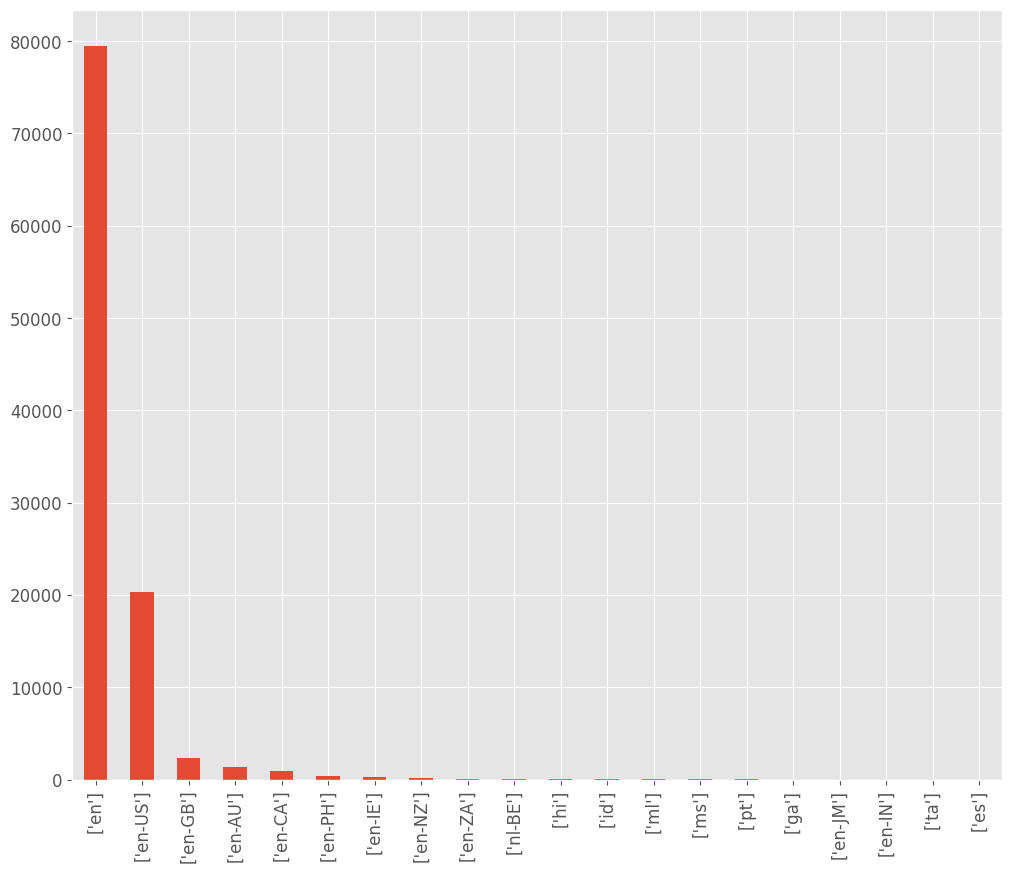

In [42]:
# Categorical Analysis

# Create a bar chart of the number of shows by language
df['language'].value_counts().plot(kind='bar')
plt.show()

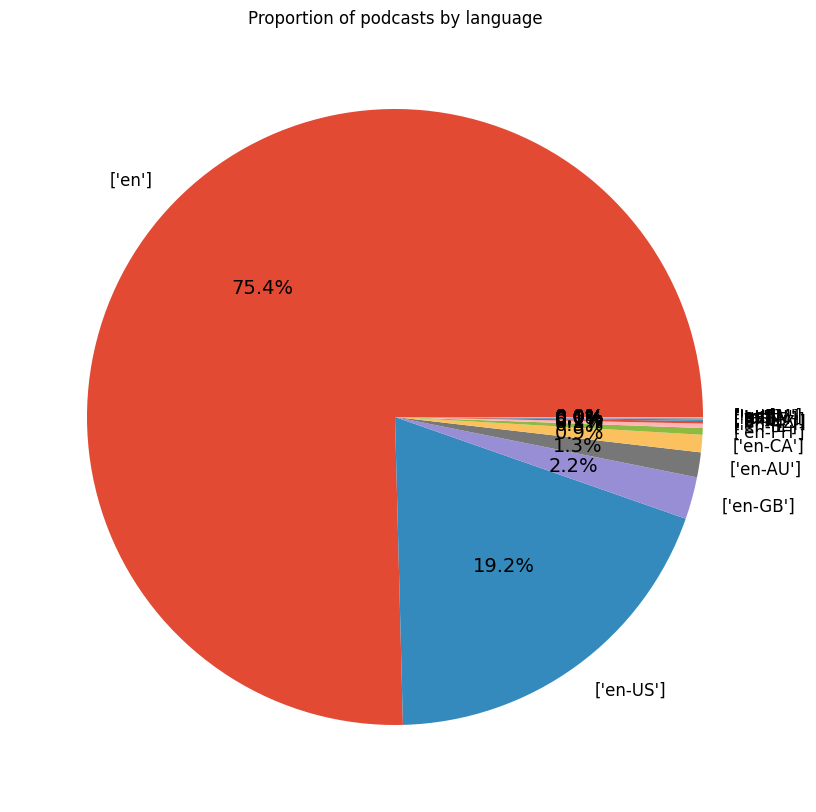

In [43]:
import matplotlib.pyplot as plt

language_counts = df['language'].value_counts()
plt.pie(language_counts.values, labels=language_counts.index, autopct='%1.1f%%')
plt.title('Proportion of podcasts by language')
plt.show()


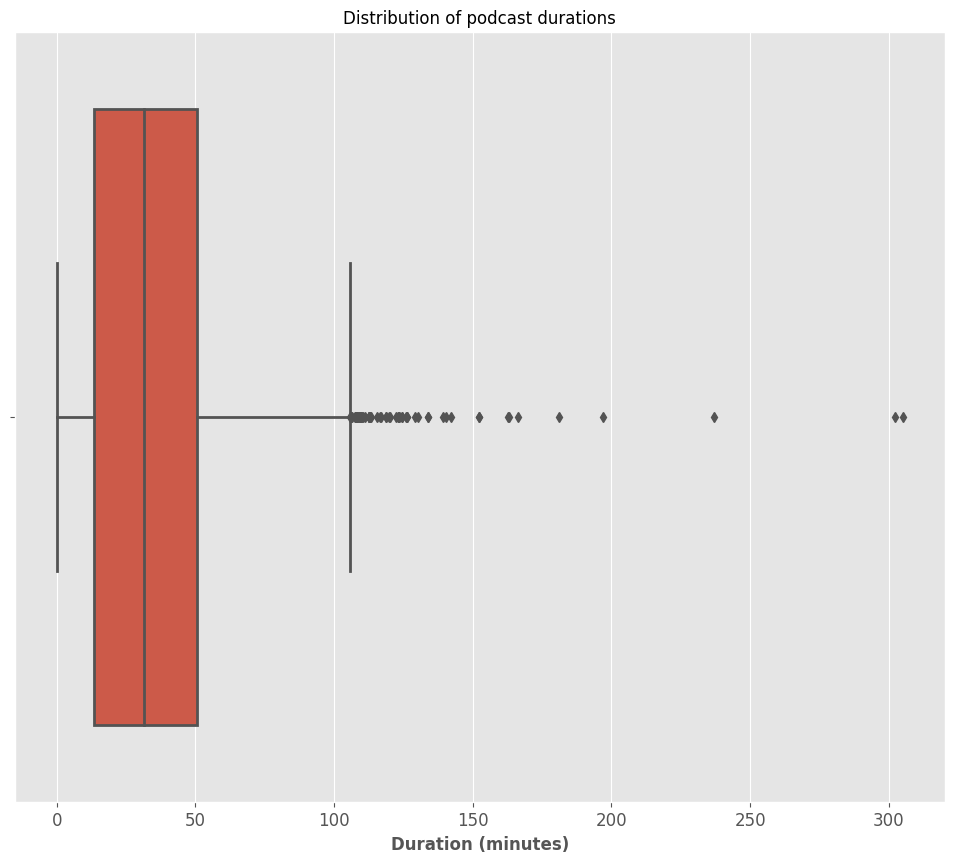

In [44]:
# Box plot of the distribution of podcast durations

sns.boxplot(x=df['duration'])
plt.title('Distribution of podcast durations')
plt.xlabel('Duration (minutes)')
plt.show()


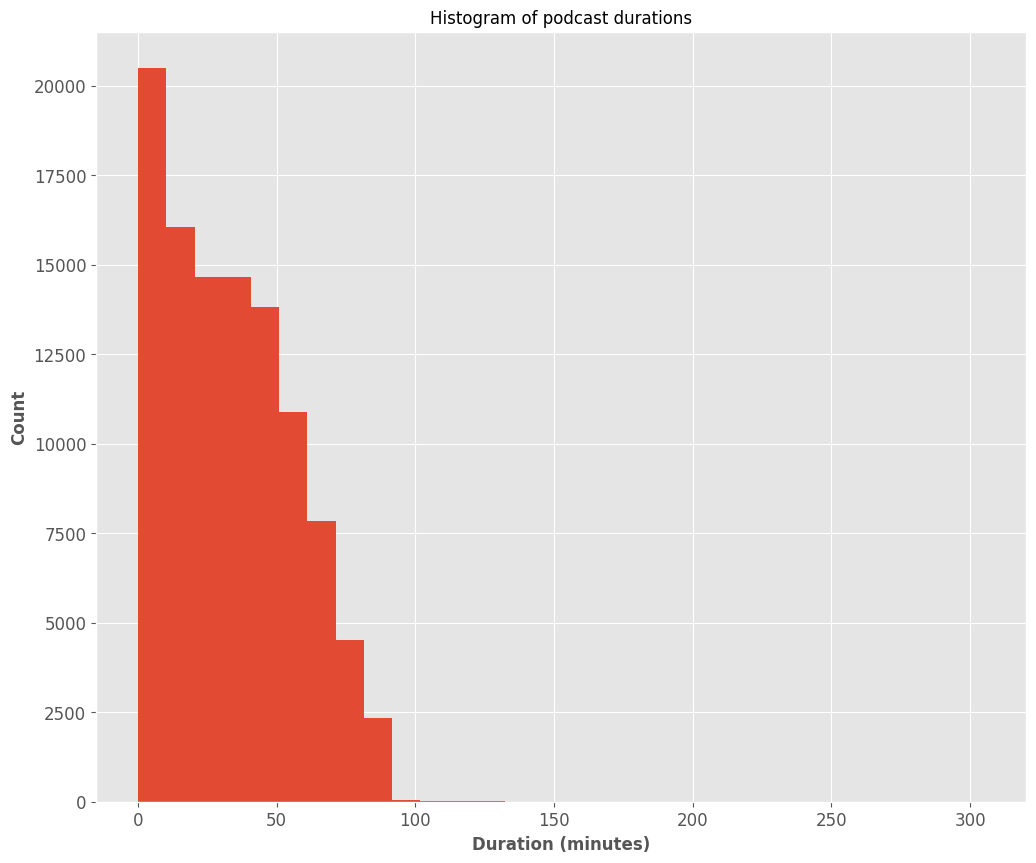

In [45]:
# Histogram of podcast durations:

import matplotlib.pyplot as plt

plt.hist(df['duration'], bins=30)
plt.title('Histogram of podcast durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


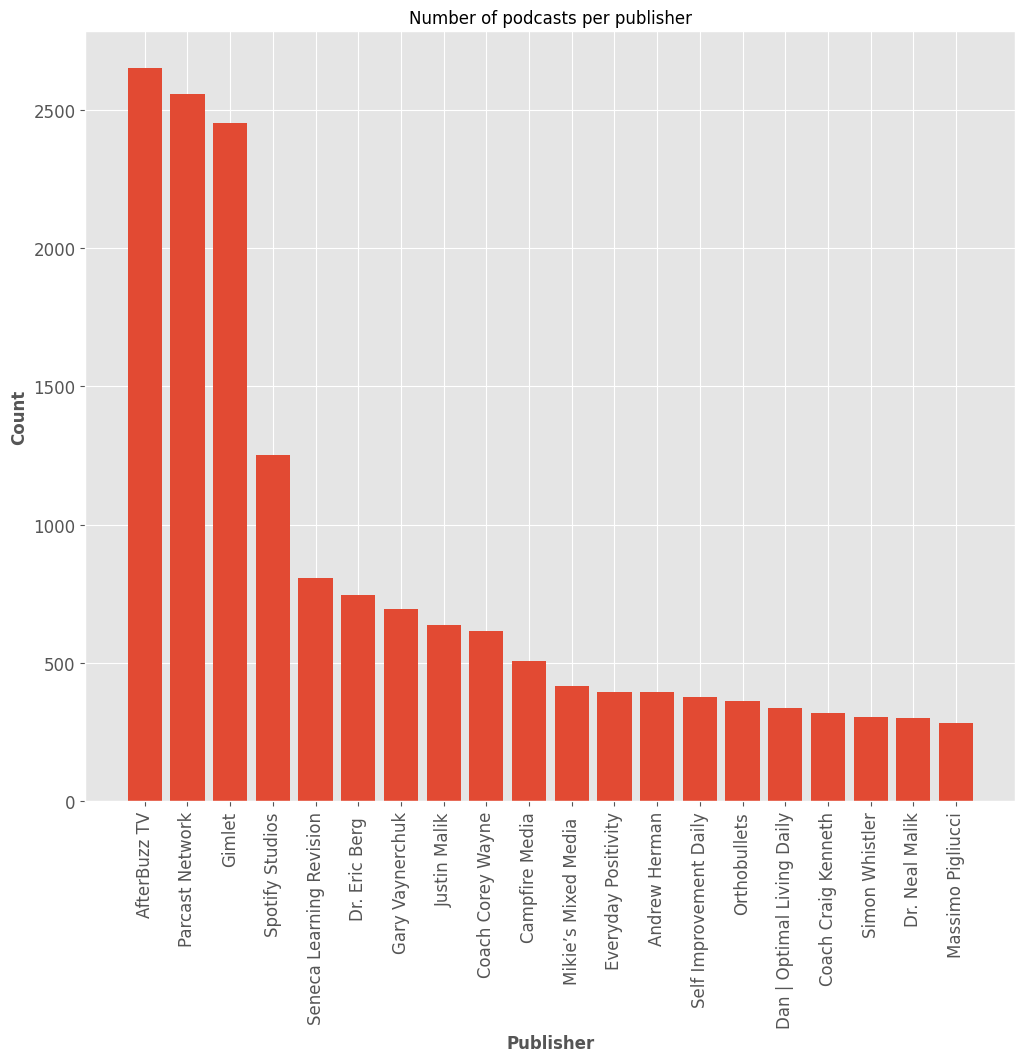

In [46]:
#Bar chart of the number of podcasts per publisher:
import matplotlib.pyplot as plt

publisher_counts = df['publisher'].value_counts().head(20)
plt.bar(publisher_counts.index, publisher_counts.values)
plt.title('Number of podcasts per publisher')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhrumil7/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


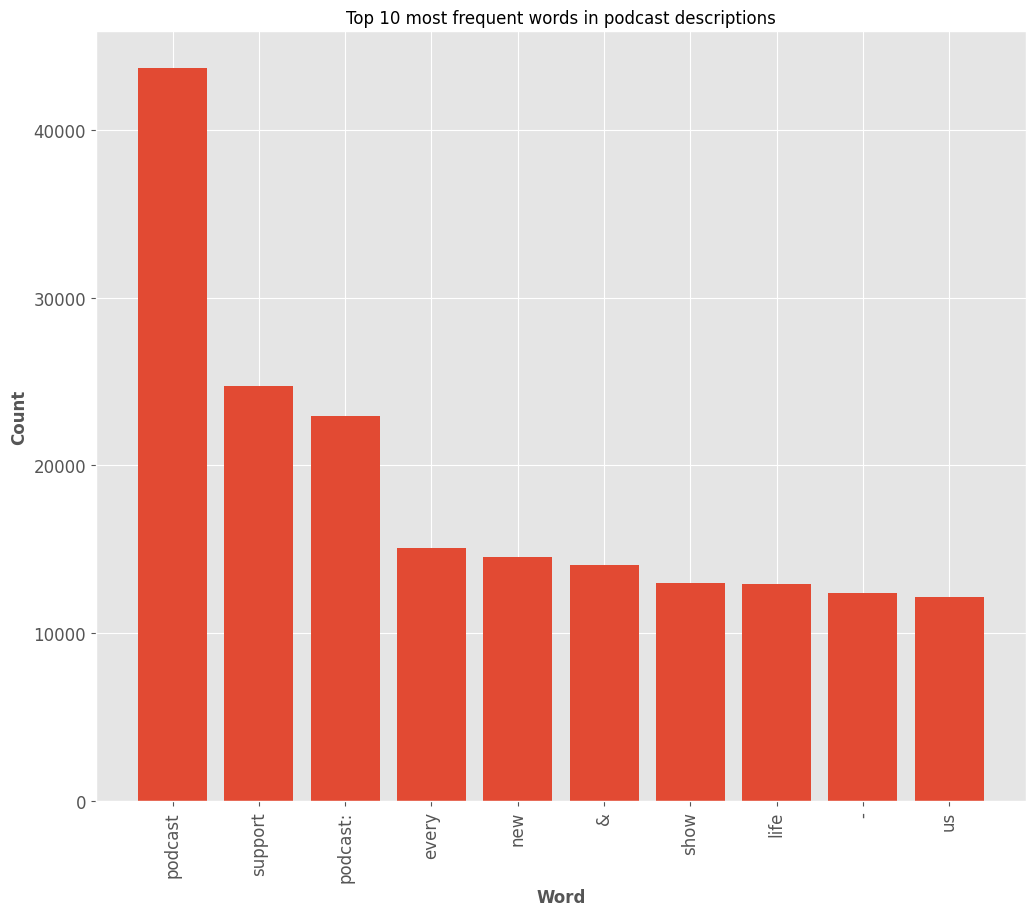

In [47]:
# Bar chart of the top 10 most frequent words in the podcast descriptions

import nltk
from collections import Counter

nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

descriptions = df['show_description'].dropna().str.lower().str.split()
word_counts = Counter(word for desc in descriptions for word in desc if word not in stop_words)
top_words = word_counts.most_common(10)

plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 most frequent words in podcast descriptions')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


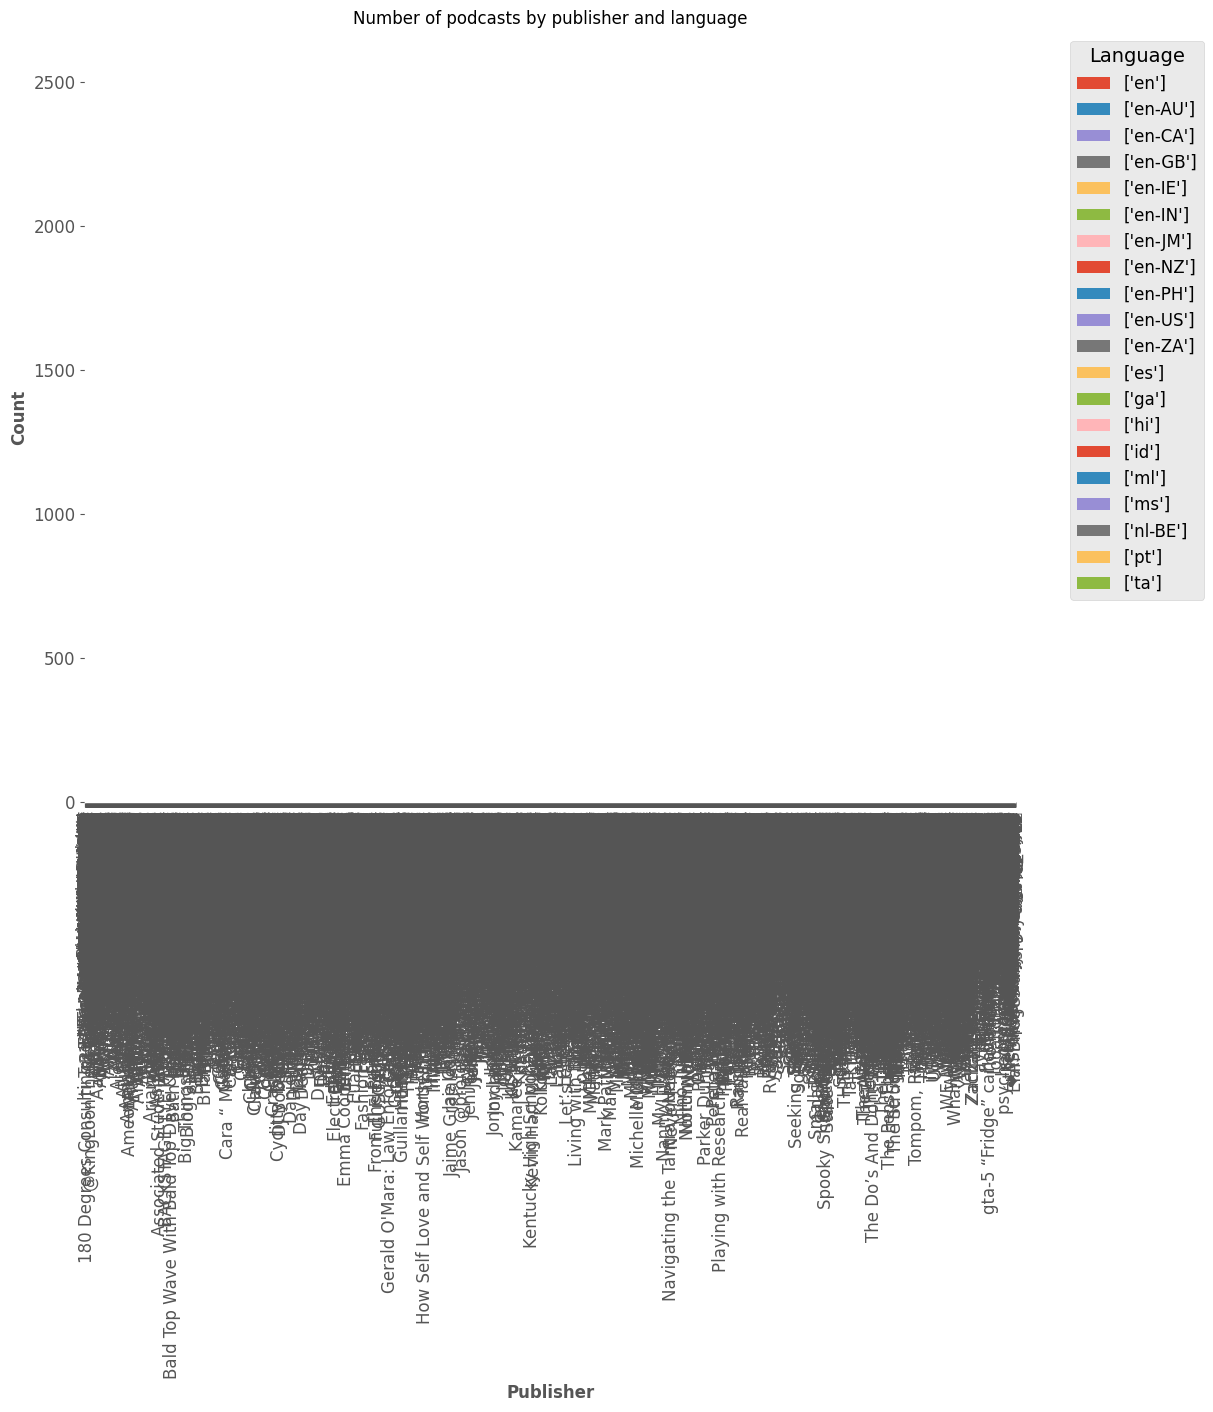

In [48]:
# publisher_language_counts = df.groupby(['publisher', 'language']).size().unstack(fill_value=0)

# publisher_language_counts.plot(kind='bar')
# plt.title('Number of podcasts by publisher and language')
# plt.xlabel('Publisher')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()
